#                                                  Housing in Brazil

#### Housing in Brazil is characterized by:

1. More than 80% of all housing units are detached houses of brick, stone, wood or concrete.  
2. Less than 10% of all housing units are apartments.  
3. Less than 10% of all housing units are rural dwellings of wood or clay.  
4. Less than 5% of all housing units are semi-private units called "quartes."  
5. Roughly 74% of all dwellings are owner occupied (1998 est.).


In [1]:
# Import Matplotlib, pandas, and plotly

import pandas as pd
import matplotlib.pyplot as plt
import plotly as ply
import plotly.express as px

## Preparing the Data

Import the CSV file brasil-real-estate-1.csv into the DataFrame df2.

In [7]:
# import csv file
df1 = pd.read_csv("brasil-real-estate-1.csv")
print("df1 type:", type(df1))
print("df1 shape:", df1.shape)
df1.head()

df1 type: <class 'pandas.core.frame.DataFrame'>
df1 shape: (12834, 6)


property_type  place_with_parent_names     region                 lat-lon  \
0     apartment  |Brasil|Alagoas|Maceió|  Northeast  -9.6443051,-35.7088142   
1     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.6430934,-35.70484   
2         house  |Brasil|Alagoas|Maceió|  Northeast  -9.6227033,-35.7297953   
3     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.622837,-35.719556   
4     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.654955,-35.700227   

   area_m2    price_usd  
0    110.0  $187,230.85  
1     65.0   $81,133.37  
2    211.0  $154,465.45  
3     99.0  $146,013.20  
4     55.0  $101,416.71

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12834 non-null  object 
 1   place_with_parent_names  12834 non-null  object 
 2   region                   12834 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  12834 non-null  float64
 5   price_usd                12834 non-null  object 
dtypes: float64(1), object(5)
memory usage: 601.7+ KB


In [10]:
df1.dropna(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11551 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            11551 non-null  object 
 1   place_with_parent_names  11551 non-null  object 
 2   region                   11551 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  11551 non-null  float64
 5   price_usd                11551 non-null  object 
dtypes: float64(1), object(5)
memory usage: 631.7+ KB


Use the "lat-lon" column to create two separate columns in df1: "lat" and "lon"

In [11]:
df1[["lat","lon"]]=df1["lat-lon"].str.split(",", expand=True).astype(float)
df1

property_type                place_with_parent_names     region  \
0         apartment                |Brasil|Alagoas|Maceió|  Northeast   
1         apartment                |Brasil|Alagoas|Maceió|  Northeast   
2             house                |Brasil|Alagoas|Maceió|  Northeast   
3         apartment                |Brasil|Alagoas|Maceió|  Northeast   
4         apartment                |Brasil|Alagoas|Maceió|  Northeast   
...             ...                                    ...        ...   
12828     apartment             |Brasil|Pernambuco|Recife|  Northeast   
12829     apartment             |Brasil|Pernambuco|Recife|  Northeast   
12830     apartment             |Brasil|Pernambuco|Recife|  Northeast   
12831     apartment  |Brasil|Pernambuco|Recife|Boa Viagem|  Northeast   
12833     apartment  |Brasil|Pernambuco|Recife|Boa Viagem|  Northeast   

                      lat-lon  area_m2    price_usd       lat        lon  
0      -9.6443051,-35.7088142    110.0  $187,230.85 -9.644305 -35.708814  
1        -9.6430934,-35.70484     65.0   $81,133.37 -9.643093 -35.704840  
2      -9.6227033,-35.7297953    211.0  $154,465.45 -9.622703 -35.729795  
3        -9.622837,-35.719556     99.0  $146,013.20 -9.622837 -35.719556  
4        -9.654955,-35.700227     55.0  $101,416.71 -9.654955 -35.700227  
...                       ...      ...          ...       ...        ...  
12828    -8.044497,-34.909519     74.0  $134,182.11 -8.044497 -34.909519  
12829    -8.056418,-34.909309     91.0  $174,748.79 -8.056418 -34.909309  
12830   -8.1373477,-34.909181    115.0  $115,459.02 -8.137348 -34.909181  
12831   -8.1136717,-34.896252     76.0  $137,302.62 -8.113672 -34.896252  
12833   -8.0578381,-34.882897     99.0  $168,507.77 -8.057838 -34.882897  

[11551 rows x 8 columns]

Use the "place_with_parent_names" column to create a "state" column.

In [12]:
df1["state"]=df1["place_with_parent_names"].str.split("|", expand=True)[2]
df1.head()

property_type  place_with_parent_names     region                 lat-lon  \
0     apartment  |Brasil|Alagoas|Maceió|  Northeast  -9.6443051,-35.7088142   
1     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.6430934,-35.70484   
2         house  |Brasil|Alagoas|Maceió|  Northeast  -9.6227033,-35.7297953   
3     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.622837,-35.719556   
4     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.654955,-35.700227   

   area_m2    price_usd       lat        lon    state  
0    110.0  $187,230.85 -9.644305 -35.708814  Alagoas  
1     65.0   $81,133.37 -9.643093 -35.704840  Alagoas  
2    211.0  $154,465.45 -9.622703 -35.729795  Alagoas  
3     99.0  $146,013.20 -9.622837 -35.719556  Alagoas  
4     55.0  $101,416.71 -9.654955 -35.700227  Alagoas

Transform the "price_usd" column of df1 so that all values are floating-point numbers instead of strings

In [13]:
df1["price_usd"]= (df1["price_usd"].astype(str).str.replace("$","",regex=False).str.replace(",", "", regex=False).astype(float))
df1.head()

property_type  place_with_parent_names     region                 lat-lon  \
0     apartment  |Brasil|Alagoas|Maceió|  Northeast  -9.6443051,-35.7088142   
1     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.6430934,-35.70484   
2         house  |Brasil|Alagoas|Maceió|  Northeast  -9.6227033,-35.7297953   
3     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.622837,-35.719556   
4     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.654955,-35.700227   

   area_m2  price_usd       lat        lon    state  
0    110.0  187230.85 -9.644305 -35.708814  Alagoas  
1     65.0   81133.37 -9.643093 -35.704840  Alagoas  
2    211.0  154465.45 -9.622703 -35.729795  Alagoas  
3     99.0  146013.20 -9.622837 -35.719556  Alagoas  
4     55.0  101416.71 -9.654955 -35.700227  Alagoas

Drop the "lat-lon" and "place_with_parent_names" columns from df1.

In [14]:
df1 = df1.drop(["lat-lon" , "place_with_parent_names"] , axis = "columns")
df1.head()

property_type     region  area_m2  price_usd       lat        lon    state
0     apartment  Northeast    110.0  187230.85 -9.644305 -35.708814  Alagoas
1     apartment  Northeast     65.0   81133.37 -9.643093 -35.704840  Alagoas
2         house  Northeast    211.0  154465.45 -9.622703 -35.729795  Alagoas
3     apartment  Northeast     99.0  146013.20 -9.622837 -35.719556  Alagoas
4     apartment  Northeast     55.0  101416.71 -9.654955 -35.700227  Alagoas

Import the CSV file brasil-real-estate-2.csv into the DataFrame df2.

In [15]:
df2 = pd.read_csv("brasil-real-estate-2.csv")
df2.head()

property_type       state     region       lat        lon  area_m2  \
0     apartment  Pernambuco  Northeast -8.134204 -34.906326     72.0   
1     apartment  Pernambuco  Northeast -8.126664 -34.903924    136.0   
2     apartment  Pernambuco  Northeast -8.125550 -34.907601     75.0   
3     apartment  Pernambuco  Northeast -8.120249 -34.895920    187.0   
4     apartment  Pernambuco  Northeast -8.142666 -34.906906     80.0   

   price_brl  
0  414222.98  
1  848408.53  
2  299438.28  
3  848408.53  
4  464129.36

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  12833 non-null  object 
 1   state          12833 non-null  object 
 2   region         12833 non-null  object 
 3   lat            12833 non-null  float64
 4   lon            12833 non-null  float64
 5   area_m2        11293 non-null  float64
 6   price_brl      12833 non-null  float64
dtypes: float64(4), object(3)
memory usage: 701.9+ KB


Use the "price_brl" column to create a new column named "price_usd". When this data was collected in 2015 and 2016, a US dollar cost 3.19 Brazilian reals.

In [17]:
df2["price_usd"]=df2["price_brl"]/3.19
df2

property_type       state     region        lat        lon  area_m2  \
0         apartment  Pernambuco  Northeast  -8.134204 -34.906326     72.0   
1         apartment  Pernambuco  Northeast  -8.126664 -34.903924    136.0   
2         apartment  Pernambuco  Northeast  -8.125550 -34.907601     75.0   
3         apartment  Pernambuco  Northeast  -8.120249 -34.895920    187.0   
4         apartment  Pernambuco  Northeast  -8.142666 -34.906906     80.0   
...             ...         ...        ...        ...        ...      ...   
12828         house   São Paulo  Southeast -23.587495 -46.559401    250.0   
12829     apartment   São Paulo  Southeast -23.522029 -46.189290     55.0   
12830     apartment   São Paulo  Southeast -23.526443 -46.529182     57.0   
12831         house   Tocantins      North  -8.848399 -48.511164      NaN   
12832     apartment   Tocantins      North -10.249091 -48.324286     70.0   

       price_brl      price_usd  
0      414222.98  129850.463950  
1      848408.53  265958.786834  
2      299438.28   93867.799373  
3      848408.53  265958.786834  
4      464129.36  145495.097179  
...          ...            ...  
12828  429194.89  134543.852665  
12829  252398.80   79121.880878  
12830  319400.84  100125.655172  
12831  529007.65  165833.119122  
12832  289457.01   90738.874608  

[12833 rows x 8 columns]

Drop the "price_brl" column from df2, as well as any rows that have NaN values.

In [18]:
df2=df2.drop("price_brl", axis="columns")
df2.dropna(inplace=True)
df2.head()

property_type       state     region       lat        lon  area_m2  \
0     apartment  Pernambuco  Northeast -8.134204 -34.906326     72.0   
1     apartment  Pernambuco  Northeast -8.126664 -34.903924    136.0   
2     apartment  Pernambuco  Northeast -8.125550 -34.907601     75.0   
3     apartment  Pernambuco  Northeast -8.120249 -34.895920    187.0   
4     apartment  Pernambuco  Northeast -8.142666 -34.906906     80.0   

       price_usd  
0  129850.463950  
1  265958.786834  
2   93867.799373  
3  265958.786834  
4  145495.097179

Concatenate df1 and df2 to create a new DataFrame named df.

In [21]:
df =pd.concat([df1,df2])
df.shape

(22844, 7)

# Explore

It's time to start exploring your data. In this section, you'll use your new data visualization skills to learn more about the regional differences in the Brazilian real estate market.

Complete the code below to create a scatter_mapbox showing the location of the properties in df.

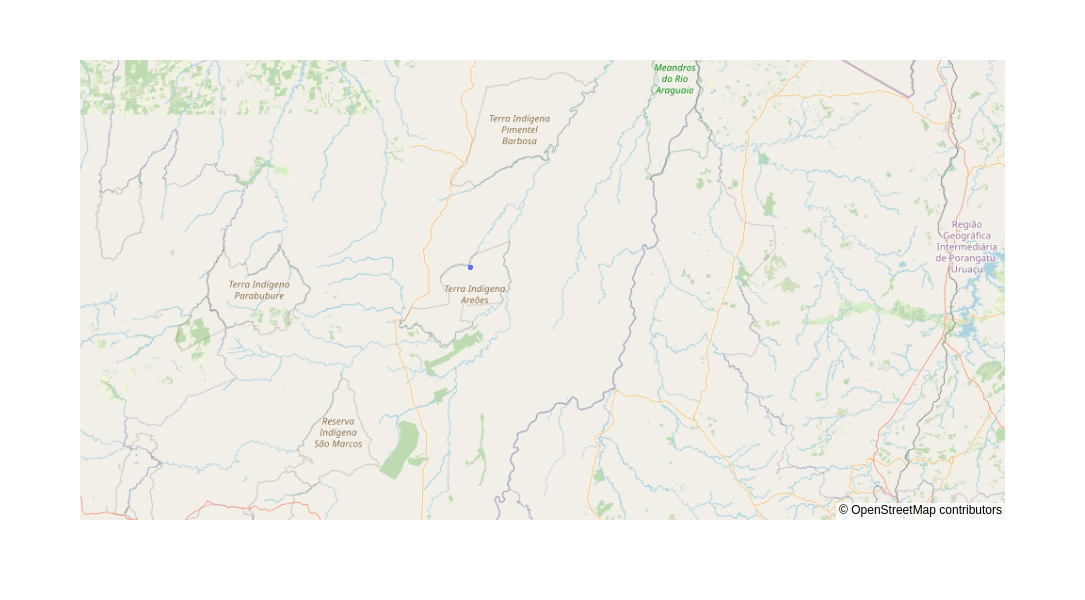

In [28]:
fig = px.scatter_mapbox(
    df1,
    lat="lat",
    lon="lon",
    center={"lat": -14.2, "lon": -51.9},  # Map will be centered on Brazil
    width=600,
    height=600,
    hover_data=["price_brl"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

Use the describe method to create a DataFrame summary_stats with the summary statistics for the "area_m2" and "price_usd" columns.

In [23]:

summary_stats = df1.describe()
summary_stats

area_m2      price_usd           lat           lon
count  11551.000000   11551.000000  11551.000000  11551.000000
mean     116.695264  181843.221930    -16.182759    -43.942239
std       48.186630   96603.990393      7.254958      5.001383
min       53.000000   74892.340000    -29.995461    -60.057747
25%       78.000000  109217.990000    -20.365431    -49.236000
50%      105.000000  152905.190000    -18.913077    -43.944378
75%      145.000000  224677.020000    -12.971690    -38.506627
max      252.000000  524246.390000      0.020423    -34.804455

In [34]:
df1.drop(["lat", "lon"], axis=1)
summary_stats = df1[["area_m2","price_brl"]].describe()
summary_stats

area_m2     price_brl
count  11293.000000  1.129300e+04
mean     113.306916  6.648971e+05
std       47.225496  3.467642e+05
min       53.000000  2.395506e+05
25%       75.000000  3.892698e+05
50%      101.000000  5.707783e+05
75%      140.000000  8.501095e+05
max      252.000000  1.676854e+06

Create a histogram of "price_usd".

Text(0.5, 1.0, 'Distribution of Home Prices')

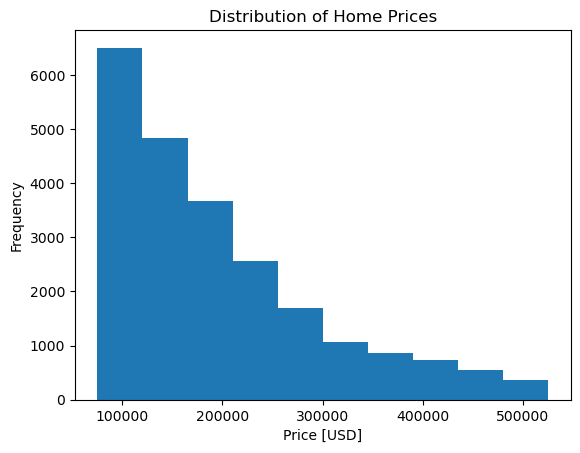

In [26]:
fig, ax = plt.subplots()

# Build histogram
ax.hist(df["price_usd"], bins=10, rwidth=1.0, color='#1f77b4')

# Label axes
ax.set_xlabel("Price [USD]")
ax.set_ylabel("Frequency")

# Add title
ax.set_title("Distribution of Home Prices")


Create a horizontal boxplot of "area_m2".

Text(0.5, 1.0, 'Distribution of Home Prices')

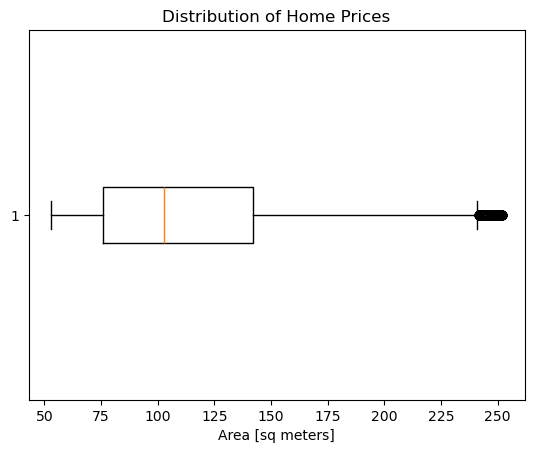

In [27]:
fig, ax = plt.subplots()

#Build box plot
plt.boxplot(df["area_m2"], vert=False)

# Label x-axis
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Prices")


shows the mean home price in each region in Brazil, sorted from smallest to largest.

In [28]:
mean_price_by_region = df.groupby("region")["price_usd"].mean()
mean_price_by_region

region
Central-West    178596.283663
North           181308.958207
Northeast       185422.985441
South           189012.345265
Southeast       208996.762778
Name: price_usd, dtype: float64

Use mean_price_by_region to create a bar chart.

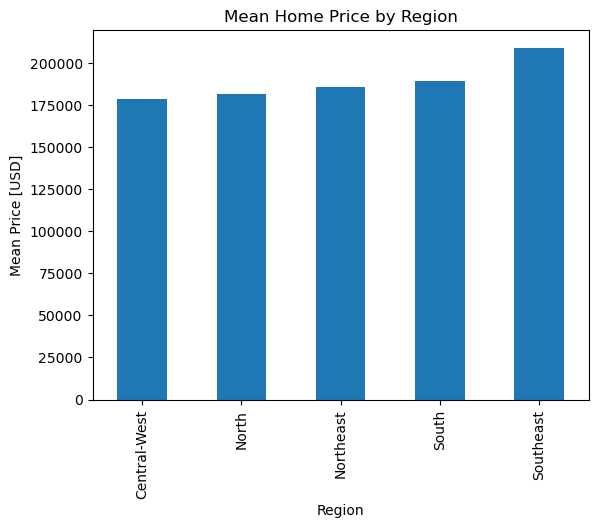

In [29]:
fig, ax = plt.subplots()
# Build bar chart, label axes, add title
mean_price_by_region.plot(
    kind="bar",
    xlabel="Region",
    ylabel="Mean Price [USD]",
    title="Mean Home Price by Region",
    ax=ax);

Now we are going to shift our focus to the southern region of Brazil, and look at the relationship between home size and price.

Create a DataFrame df_south that contains all the homes from df that are in the "South" region.

In [33]:
df_south = df[df["region"] == "South"]
df_south.head()

property_type region  area_m2  price_usd        lat        lon   state
9304     apartment  South    127.0  296448.85 -25.455704 -49.292918  Paraná
9305     apartment  South    104.0  219996.25 -25.455704 -49.292918  Paraná
9306     apartment  South    100.0  194210.50 -25.460236 -49.293812  Paraná
9307     apartment  South     77.0  149252.94 -25.460236 -49.293812  Paraná
9308     apartment  South     73.0  144167.75 -25.460236 -49.293812  Paraná

Use the value_counts method to create a Series homes_by_state that contains the number of properties in each state in df_south.

In [34]:
homes_by_state = df_south["state"].value_counts()
homes_by_state

state
Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: count, dtype: int64

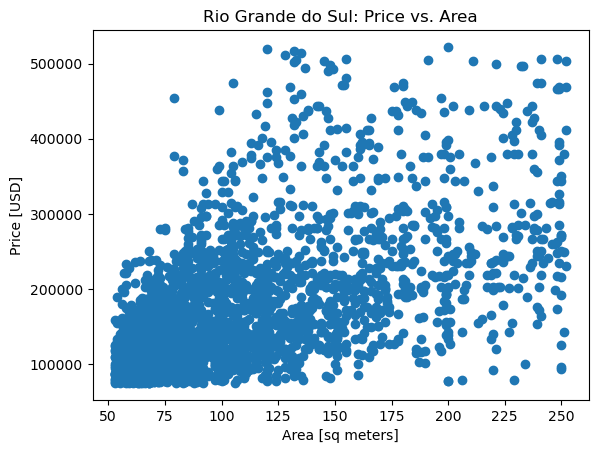

In [36]:
df_rgs = df[df['state'] == 'Rio Grande do Sul']
fig, ax = plt.subplots()
ax.scatter(df_rgs['area_m2'], df_rgs['price_usd'])
ax.set_xlabel("Area [sq meters]")
ax.set_ylabel("Price [USD]")
ax.set_title("Rio Grande do Sul: Price vs. Area")
plt.show()

In [37]:
south_states = ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro']
expected_states = ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro']
df_south = df[df['state'].isin(expected_states)]

south_states_corr = df_south.groupby('state').apply(
   lambda x: x['area_m2'].corr(x['price_usd'])
)
south_states_corr = south_states_corr.round(6)  
south_states_corr = south_states_corr.to_dict()
print(south_states_corr)


{'Espírito Santo': 0.67637, 'Minas Gerais': 0.587676, 'Rio de Janeiro': 0.431907}
